## Assignment 3: Neural Networks


In this task you will predict concrete compressive strength as a function of age and its ingredients using neural networks

In [87]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
%matplotlib notebook

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Load the dataset

In [76]:
data = pd.read_excel('Concrete_Data.xls')

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print("N features: {}\nN samples: {}".format(x.shape[1], x.shape[0]))

N features: 8
N samples: 1030


### Exercise 1

* Using scikit-learn function train_test_split() split the data set randomly into train and test sets in ratio 3:1
* Build a multilayer perceptron (using MLPRegressor from scikit-learn) with 1 hidden layer with sigmoid activation function, the top layer has one output with linear activation

In [77]:
# ============= Your code here =============
# assign training and test sets to variables
# x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# ============= Your code here =============
# train an MLP, assign an MLP model mlp varable
mlp = MLPRegressor(activation='logistic', max_iter=5000, warm_start=True, 
                   random_state=42, solver='lbfgs')
mlp.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)

In [78]:
mlp.predict(X_test);

In [79]:
print "Testing error:", np.linalg.norm(mlp.predict(X_test) - y_test) / np.linalg.norm(y_test)

Testing error: 0.30674216258


### Exercise 2
* Let p be a number of neurons in hidden layer. For $p \in \{1, 2, ..., 20\}$ fit a neural network and calculate quality of approximation (mean absolute error, MAE) using test set x_test, y_test
* Plot figure "p vs. MAE"

In [91]:
# 1. Complete function calc_mae(y_pred, y_test):
#    this function takes as arguments predicted
#    values and actual values and returns MAE
# 2. For each p in [1, 2, ... 20] fit an MLP and
#    calculate MAE
# 3. Plot figure "p vs. MAE"


# ================ Your code here ================
# 1. Complete function calc_mae(y_pred, y_test)
def calc_mae(y_pred, y_test):
    mae = np.linalg.norm(y_pred - y_test, 1) / len(y_pred)
    return mae


# ================= Your code here =================
# 2. For each p in [1, 2, ... 20] fit an MLP and
#    calculate MAE

mae = np.zeros(20)
for p in range(1, 21):
    mlp = MLPRegressor(hidden_layer_sizes=(p), activation='logistic', max_iter=5000, warm_start=True, 
                   random_state=42, solver='lbfgs')
    mlp.fit(X_train, y_train)
    
    mae[p - 1] = calc_mae(mlp.predict(X_test), y_test)


In [93]:
mae

array([ 13.54791269,  13.54791253,  13.54791253,  13.54791206,
        10.58530412,  13.54791256,  13.40637962,  13.54791259,
        13.54791723,  13.54791261,  13.54791241,  13.54791258,
        13.54791261,  13.54791259,  13.54791259,  13.54791261,
        13.54791261,  13.54791262,   9.66692376,  13.54791261])

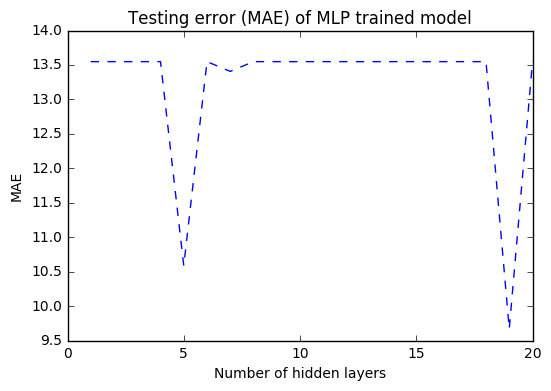

In [92]:
# ================= Your code here =================
# 3. Plot figure "p vs. MAE"
p = range(1, 21)
plt.plot(p, mae, '--')
plt.ylabel('MAE')
plt.xlabel("Number of hidden layers")
plt.title("Testing error (MAE) of MLP trained model")

We observe that the number of hidden layers that gives us the minimum MAE error is $5$. 

### Exercise 3

During model fit
* Random splitting of the training set into training set (used for parameters fitting) and validation set (used for stopping of fitting procedure) is used
* The parameters of MLP are initialized randomly

Due to these reasons the resulting MLP can vary from run to run.
Therefore, to obtain more reliable results it is proposed to train ensemble of MLPs.
Prediction of ensemble of MLPs is an average of predictions of all MLPs in ensemble

Task
* For chosen fixed number of neurons p* build an ensemble of MLPs of different sizes from 1 to 20
* For each ensemble calculate MAE
* Plot "ensemble size vs. MAE" figure: consider 2 cases:
  1. the MLPs are added to the ensemble in random order
  2. the MLPs are added to the ensemble in ascending order of the error on the training set

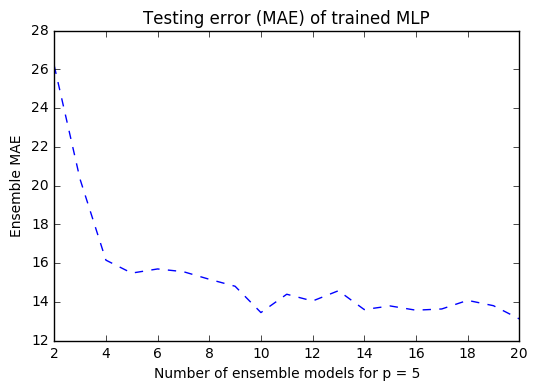

In [109]:
# ================ Your code here ================
# 1. For chosen fixed number of neurons p* build
# an ensemble of MLPs of different sizes
# from 1 to 20
p_star = 19

ensemble_mae = np.zeros(20)
for ensemble_size in range(1, 21):
    mae_error = 0
    for i in range(ensemble_size):
        mlp = MLPRegressor(hidden_layer_sizes=(p_star), activation='logistic', 
                           max_iter=5000, warm_start=True, solver='lbfgs')
        mlp.fit(X_train, y_train)
        mae_error += calc_mae(mlp.predict(X_test), y_test)
        size_ = i
    ensemble_mae[ensemble_size - 1] = mae_error / size_

p = range(1, 21)
plt.plot(p, ensemble_mae, '--')
plt.ylabel('Ensemble MAE')
plt.xlabel("Number of ensemble models for p = 5")
plt.title("Testing error (MAE) of trained MLP")

# ================ Your code here ================
# 2. For each ensemble calculate MAE


# ================ Your code here ================
# 3. Plot "ensemble size vs. MAE" figure: consider 2 cases:
#   1. the MLPs are added to the ensemble in random order
#   2. the MLPs are added to the ensemble in ascending order of the error on the training set

In [110]:
ensemble_mae

array([         inf,  26.17823476,  20.3218746 ,  16.14698808,
        15.47872776,  15.69274255,  15.55127594,  15.16026613,
        14.79998025,  13.44216975,  14.38778238,  14.03883339,
        14.56833391,  13.59641466,  13.78400465,  13.5640836 ,
        13.62748202,  14.07209439,  13.79709978,  13.11606208])

In [98]:
mae

array([ 13.54791269,  13.54791253,  13.54791253,  13.54791206,
        10.58530412,  13.54791256,  13.40637962,  13.54791259,
        13.54791723,  13.54791261,  13.54791241,  13.54791258,
        13.54791261,  13.54791259,  13.54791259,  13.54791261,
        13.54791261,  13.54791262,   9.66692376,  13.54791261])

In [105]:
mlp = MLPRegressor(hidden_layer_sizes=(p_star), activation='logistic', 
                           max_iter=5000, solver='lbfgs')
mlp.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [106]:
calc_mae(mlp.predict(X_test), y_test)

13.54790464850781